# Group 7

Mukesh Reddy Mavurapu,
Nikhitha Peddi,
Shiva Sai Ram Prasad Reddy Yelipeddi

## Part 1 Data Preprocessing and feature extraction

#### Find a way to build a corpus (e.g. load the data as large character, split up the input data into individual articles and build a corpus object containing all splitted articles)

#### clean up the corpus, make sure you separate meta-data from the actual articles

#### extract features

#### create summaries on the features as exploration

#### create some plots for exploration

In [3]:
import pandas as pd
import os
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize.casual import TweetTokenizer, casual_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')


# !pip install spacy
# !pip install pyLDAvis

import warnings
warnings.filterwarnings("ignore") 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Read the file from local directory and 
file_path = r'C:\Users\mukes\Downloads\Text Mining Project3\Articles'
data = []
for file_name in os.listdir(file_path):
    file = os.path.join(file_path, file_name)
    data.append(open(file, "r", encoding="utf8").read())

In [5]:
# data cleaning
cleaned_articles = []
# Specify the keywords to split the articles
keywords = ['Document NYTF', 'Document INHT', 'Document WSJ', 'Document J000','Document AWSJ']
clean_keywords = ["All Rights Reserved", "Japanese Copyright"]

#remove all the characters other than alphabets
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#remove unwanted data
def data_cleaning_remaining_data(cleaned_articles):
    for i,articles in enumerate(cleaned_articles):
        if len(articles)<350 or not any(x in articles for x in clean_keywords):
            print(articles)
            del cleaned_articles[i]
    return cleaned_articles

def article_split(text, cleaned_articles):

    articles = re.split('|'.join(keywords), text)

    # Clean each article
    cleaned_articles.extend([clean_text(article) for article in articles])
    print(cleaned_articles[-1])
    # remove the unwanted documnets without any context.
    cleaned_articles.pop()
    cleaned_articles = data_cleaning_remaining_data(cleaned_articles)

    
#run through each article to clean the data
corpus = [article_split(article,cleaned_articles) for article in data]

edi
eddz
edu
edb
EEDedv
edtc
edhx
EEDedkvd
edcd
EEDedhjh
EEDedx
edq
Oeccudy
Oedvml
Oedmey WSJ Japanese By JULIAN E BARNES and NATALIA DROZDIAK words March WSJOJP Japanese Copyright Dow Jones Company Inc IS IS IS b ISISb IS
ed WSJ Japanese IS SNS By Nicole Hong words March WSJOJP Japanese Copyright Dow Jones Company Inc Mo IS FBI FBI ISFBI ISIS IS FBI FBI FBIFBI FBI S IS IS IS IS b ISISb IS
Oedf WSJ Japanese IS By BEN KESLING AND AWADH ALTAIE words March WSJOJP Japanese Copyright Dow Jones Company Inc IS IS ISISIS IS IS SIS AK IS b ISISb
edv Page One Under Pressure From Iraqi Forces ISIS Deploys Booby Traps Iraqi troops clashed with Islamic State fighters in Mosul on Sunday while civilians told of new atrocities by the jihadists words March The Wall Street Journal Online WSJO English Copyright Dow Jones Company Inc All Rights Reserved
Oedbj WSJ Japanese By LAURA MECKLER and GORDON LUBOLD words March WSJOJP Japanese Copyright Dow Jones Company Inc IS IS b ISISb
Eedlz WSJ Japanese By WILL

In [6]:
print("The number of articles present after cleaning are: ", str(len(cleaned_articles)))

The number of articles present after cleaning are:  1618


In [7]:
cleaned_articles[0][:300]

'World Europe In Turkey US Hand Is Seen in Nearly Every Crisis By TIM ARANGO words January NYTimescom Feed NYTFEED English Copyright The New York Times Company All Rights Reserved ISTANBUL urkish officials accused the United States of abetting a failed coup last summer When the Russian ambassador to '

In [8]:
# seperate metedata from the orginal articles
metadata_list = []
articles_data = []
for i,articles in enumerate(cleaned_articles):
    metadata = ""
    for keyword in clean_keywords:
        if keyword in articles:
            data_splitted = articles.split(keyword, 1)
            metadata_list.append(data_splitted[0])
            articles_data.append(data_splitted[1])
            break

In [9]:
# articles_data has all the data after removing metedata
articles_data[0][:300]

' ISTANBUL urkish officials accused the United States of abetting a failed coup last summer When the Russian ambassador to Turkey was assassinated last month the Turkish press said the United States was behind the attack And once again after a gunman walked into an Istanbul nightclub early on New Yea'

In [10]:
# datapreprocessing 
word_list_with_stopwords =[]
word_list_without_stopwords = []
word_list = []
word_freq = {}
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

for articles in articles_data:
    #tokenize the articles
    words = word_tokenize(articles)
    words = [word.lower() for word in words if word.isalnum()]
    word_list_with_stopwords.append(words)
    
    #remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    word_list_without_stopwords.append(words)
    
    #stemming
    words = [porter.stem(word) for word in words]
    word_list.append(words)
    
    #get word frequency of each 
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
            

In [11]:
word_list[0][:10]

['istanbul',
 'urkish',
 'offici',
 'accus',
 'unit',
 'state',
 'abet',
 'fail',
 'coup',
 'last']

In [12]:
cleaned_corpus = []
for word in word_list:
    tokens = ' '.join(word)  # join the words with spaces
    cleaned_corpus.append(tokens)

In [13]:
cleaned_corpus[0][:100]

'istanbul urkish offici accus unit state abet fail coup last summer russian ambassador turkey assassi'

## Feature extraction

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming cleaned_corpus is your list of cleaned articles
corpus = cleaned_corpus

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned corpus to create a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense matrix and create a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print the first few rows of the DataFrame
tfidf_df

aa  aal  aalla  aamaq  aamur  aana  aap  aara  aaron  aazaldin  ...  \
0     0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
1     0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
2     0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
3     0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
4     0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
...   ...  ...    ...    ...    ...   ...  ...   ...    ...       ...  ...   
1613  0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
1614  0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
1615  0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
1616  0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   
1617  0.0  0.0    0.0    0.0    0.0   0.0  0.0   0.0    0.0       0.0  ...   

      zumba  zurich  zusha  zushaelinsonwsjcom  zuylen  zverev  zvornik  \
0       0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
1       0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
2       0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
3       0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
4       0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
...     ...     ...    ...                 ...     ...     ...      ...   
1613    0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
1614    0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
1615    0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
1616    0.0     0.0    0.0                 0.0     0.0     0.0      0.0   
1617    0.0     0.0    0.0                 0.0     0.0     0.0      0.0   

      zvulunreut  zway   zy  
0            0.0   0.0  0.0  
1            0.0   0.0  0.0  
2            0.0   0.0  0.0  
3            0.0   0.0  0.0  
4            0.0   0.0  0.0  
...          ...   ...  ...  
1613         0.0   0.0  0.0  
1614         0.0   0.0  0.0  
1615         0.0   0.0  0.0  
1616         0.0   0.0  0.0  
1617         0.0   0.0  0.0  

[1618 rows x 34514 columns]

In [15]:
tfidf_df.columns

Index(['aa', 'aal', 'aalla', 'aamaq', 'aamur', 'aana', 'aap', 'aara', 'aaron',
       'aazaldin',
       ...
       'zumba', 'zurich', 'zusha', 'zushaelinsonwsjcom', 'zuylen', 'zverev',
       'zvornik', 'zvulunreut', 'zway', 'zy'],
      dtype='object', length=34514)

In [22]:
# top 20 words based on the tfidf 
top_words = tfidf_df.mean().sort_values(ascending=False)[:20]
top_words

said        0.061177
mr          0.060508
state       0.055139
trump       0.050740
islam       0.044182
us          0.034407
syria       0.031786
attack      0.030439
forc        0.029240
presid      0.027655
american    0.027290
militari    0.026960
iraq        0.026528
offici      0.025983
iraqi       0.025424
syrian      0.025401
unit        0.024539
new         0.023725
group       0.022912
peopl       0.021277
dtype: float64

In [17]:
# top 10 most frequent words from the word_freq dictinary
from operator import itemgetter

top_20_frequent_words = dict(sorted(word_freq.items(), key=itemgetter(1), reverse=True)[:20])
top_20_frequent_words

{'said': 11592,
 'state': 10355,
 'mr': 9926,
 'trump': 7400,
 'islam': 6599,
 'presid': 4558,
 'us': 4552,
 'one': 4222,
 'attack': 4220,
 'new': 4188,
 'american': 4044,
 'peopl': 4005,
 'time': 3990,
 'syria': 3886,
 'would': 3861,
 'forc': 3841,
 'unit': 3737,
 'year': 3451,
 'offici': 3400,
 'group': 3313}

In [18]:
# Get top 1 words for each document
top_words_per_doc = tfidf_df.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

# Print top words for all the documents
for i, top_words in enumerate(top_words_per_doc):
    print(f"Top words for Document {i + 1}:\n{top_words}\n{'='*50}\n")

Top words for Document 1:
['nightclub', 'turkey', 'istanbul', 'erdogan', 'turkish']

Top words for Document 2:
['nigeria', 'god', 'nigerian', 'hymn', 'ekwuem']

Top words for Document 3:
['sarfo', 'prison', 'german', 'recruit', 'describ']

Top words for Document 4:
['baghdad', 'sadr', 'holland', 'hashim', 'labor']

Top words for Document 5:
['holland', 'labor', 'baghdad', 'hashim', 'sadr']

Top words for Document 6:
['turkey', 'gunman', 'attack', 'kurtulmu', 'turkish']

Top words for Document 7:
['afghanistan', 'obama', 'mr', 'troop', 'war']

Top words for Document 8:
['afghanistan', 'obama', 'mr', 'troop', 'american']

Top words for Document 9:
['istanbul', 'ankara', 'kill', 'suicid', 'wound']

Top words for Document 10:
['orlando', 'brussel', 'bours', 'blast', 'devic']

Top words for Document 11:
['rape', 'pregnanc', 'pregnant', 'women', 'birth']

Top words for Document 12:
['chapo', 'hideout', 'el', 'gunman', 'verdugoassoci']

Top words for Document 13:
['slave', 'yazidi', 'kecia', 

## Plots

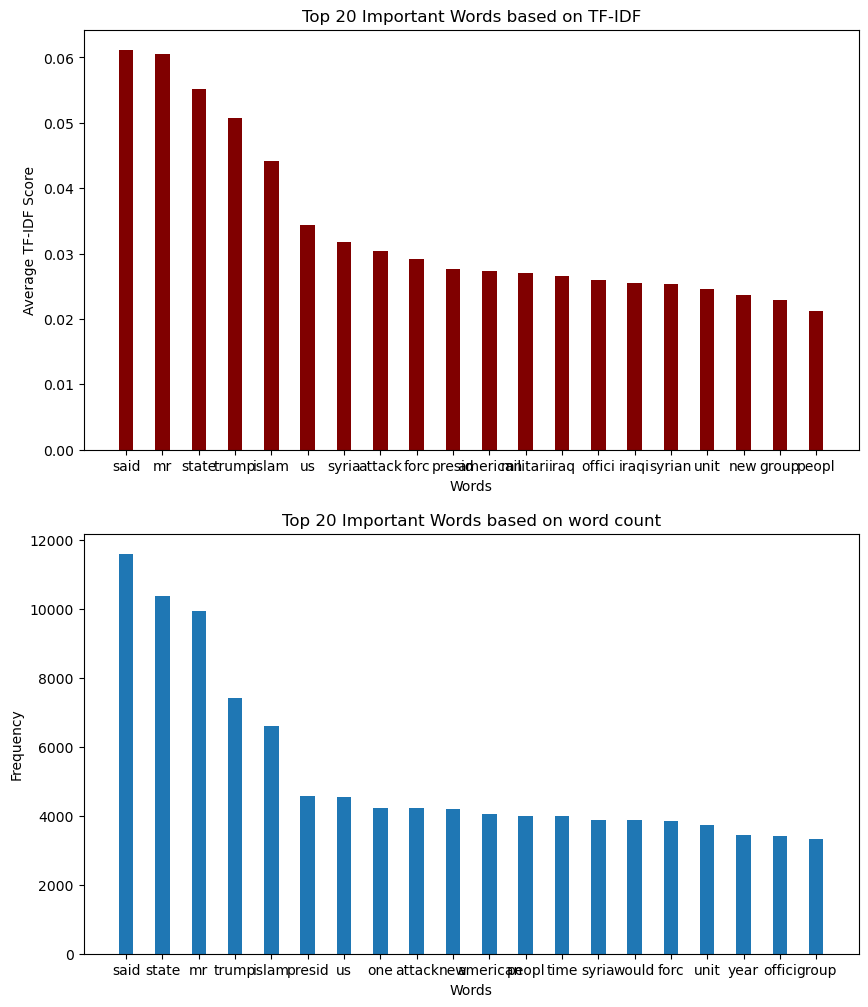

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, figsize=(10, 12))

# Plot for the top 10 important words based on TF-IDF
axs[0].bar(top_words.index, top_words.values, color='maroon', width=0.4)
axs[0].set_title('Top 20 Important Words based on TF-IDF')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Average TF-IDF Score')

# Plot for the top 20 frequent words
axs[1].bar(top_20_frequent_words.keys(), top_20_frequent_words.values(), width=0.4)
axs[1].set_title('Top 20 Important Words based on word count')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')

plt.show()

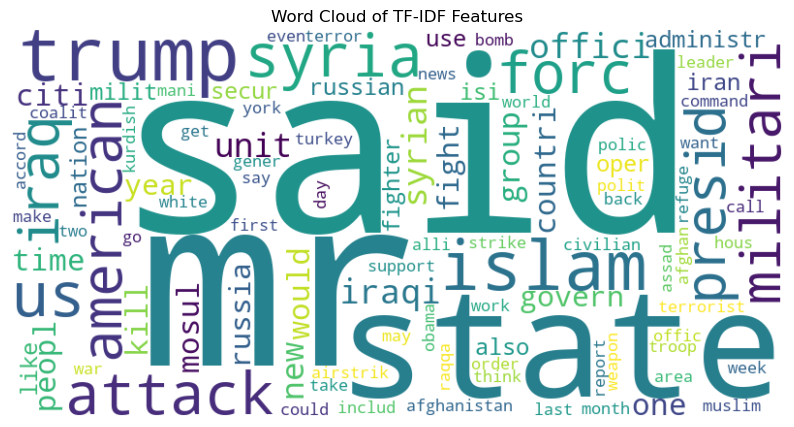

In [136]:
# wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(tfidf_df.sum().to_dict())

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Features')
plt.show()

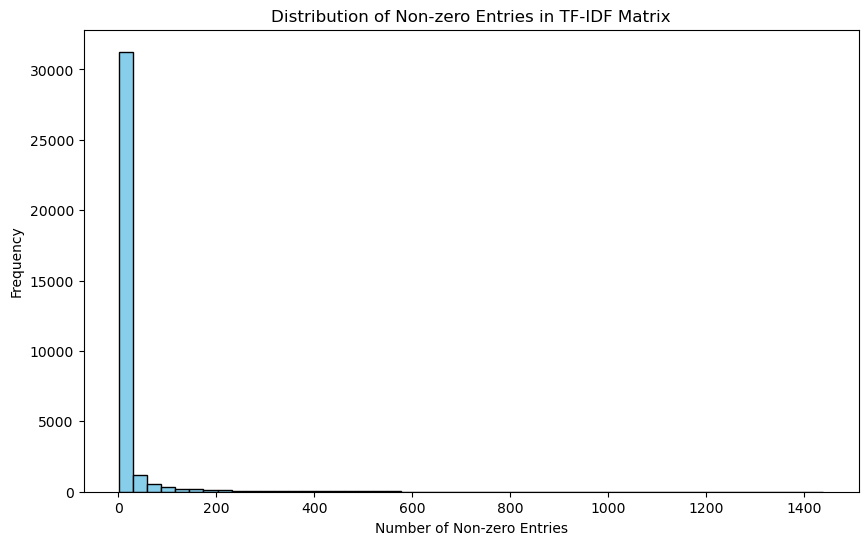

In [140]:
# Calculate the count of non-zero entries for each feature
non_zero_counts = tfidf_df.astype(bool).sum(axis=0)

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(non_zero_counts,bins = 50, color='skyblue', edgecolor='black')
plt.title('Distribution of Non-zero Entries in TF-IDF Matrix')
plt.xlabel('Number of Non-zero Entries')
plt.ylabel('Frequency')
plt.show()

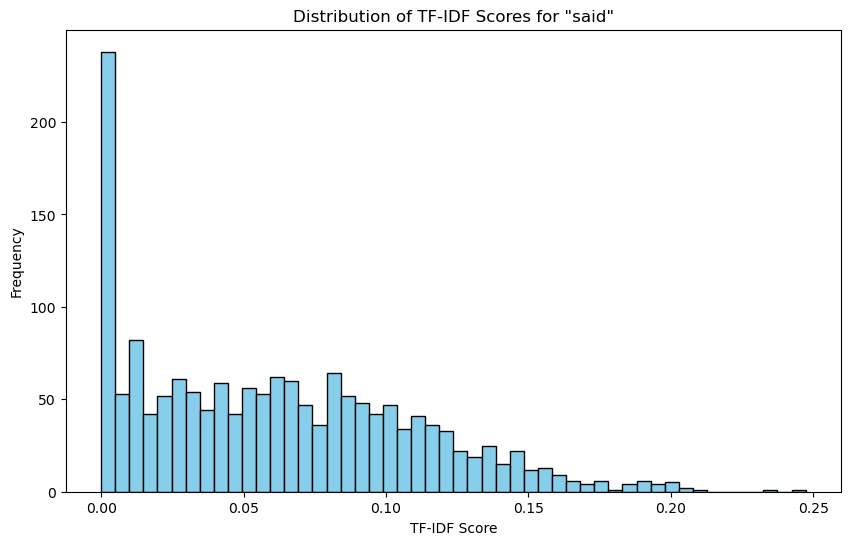

In [141]:
# Choose a word for analysis
selected_word = 'said'

# Plot histogram of TF-IDF scores for the selected word
plt.figure(figsize=(10, 6))
plt.hist(tfidf_df[selected_word], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Distribution of TF-IDF Scores for "{selected_word}"')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.show()

# Part 2 - Topic Modeling

#### create a topic model using your cleaned corpus (you may have to go back into preprocessing steps to make modifications)

#### re-run the topic modeling multiple times with different parameters and store summaries into output files

#### discuss the different results in the context described in the overview statement

#### support your findings with relevant model outputs and visualizations

In [231]:
from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy # spaCy for preprocessing
import pyLDAvis # Plotting tools
import pyLDAvis.gensim_models
import pyLDAvis.gensim
import pickle

In [168]:
#we have list of all the articles without metadata as a list and we need to data preprocessing for topic modeling
articles_data[0][:1000]

' ISTANBUL urkish officials accused the United States of abetting a failed coup last summer When the Russian ambassador to Turkey was assassinated last month the Turkish press said the United States was behind the attack And once again after a gunman walked into an Istanbul nightclub early on New Year Day and killed dozens the progovernment news media pointed a finger at the United States merica Chief Suspectne headline blared after the attack On Twitter a Turkish lawmaker referring to the name of the nightclub wrote hoever the triggerman is Reina attack is an act of CIA Period Turkey has been confronted with a cascade of crises that seem to have only accelerated as the Syrian civil war has spilled across the border But the events have not pushed Turkey closer to its NATO allies Conversely they have drifted further apart as the nation lashes out at Washington and moves closer to Moscow working with the Russian president Vladimir V Putin to secure a ceasefire in Syria One story in the T

In [169]:
# Remove Emails 
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in articles_data]  
# Remove new line characters 
data = [re.sub(r'\s+', ' ', sent) for sent in data]  
# Remove distracting single quotes 
data = [re.sub("\'", "", sent) for sent in data]  
pprint(data[:1][:1000])

[' ISTANBUL urkish officials accused the United States of abetting a failed '
 'coup last summer When the Russian ambassador to Turkey was assassinated last '
 'month the Turkish press said the United States was behind the attack And '
 'once again after a gunman walked into an Istanbul nightclub early on New '
 'Year Day and killed dozens the progovernment news media pointed a finger at '
 'the United States merica Chief Suspectne headline blared after the attack On '
 'Twitter a Turkish lawmaker referring to the name of the nightclub wrote '
 'hoever the triggerman is Reina attack is an act of CIA Period Turkey has '
 'been confronted with a cascade of crises that seem to have only accelerated '
 'as the Syrian civil war has spilled across the border But the events have '
 'not pushed Turkey closer to its NATO allies Conversely they have drifted '
 'further apart as the nation lashes out at Washington and moves closer to '
 'Moscow working with the Russian president Vladimir V Putin 

In [170]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['istanbul', 'urkish', 'officials', 'accused', 'the', 'united', 'states', 'of', 'abetting', 'failed', 'coup', 'last', 'summer', 'when', 'the', 'russian', 'ambassador', 'to', 'turkey', 'was', 'assassinated', 'last', 'month', 'the', 'turkish', 'press', 'said', 'the', 'united', 'states', 'was', 'behind', 'the', 'attack', 'and', 'once', 'again', 'after', 'gunman', 'walked', 'into', 'an', 'istanbul', 'nightclub', 'early', 'on', 'new', 'year', 'day', 'and', 'killed', 'dozens', 'the', 'progovernment', 'news', 'media', 'pointed', 'finger', 'at', 'the', 'united', 'states', 'merica', 'chief', 'suspectne', 'headline', 'blared', 'after', 'the', 'attack', 'on', 'twitter', 'turkish', 'lawmaker', 'referring', 'to', 'the', 'name', 'of', 'the', 'nightclub', 'wrote', 'hoever', 'the', 'triggerman', 'is', 'reina', 'attack', 'is', 'an', 'act', 'of', 'cia', 'period', 'turkey', 'has', 'been', 'confronted', 'with', 'cascade', 'of', 'crises', 'that', 'seem', 'to', 'have', 'only', 'accelerated', 'as', 'the', '

In [171]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['istanbul', 'urkish', 'officials', 'accused', 'the', 'united', 'states', 'of', 'abetting', 'failed', 'coup', 'last', 'summer', 'when', 'the', 'russian', 'ambassador', 'to', 'turkey', 'was', 'assassinated', 'last', 'month', 'the', 'turkish', 'press', 'said', 'the', 'united', 'states', 'was', 'behind', 'the', 'attack', 'and', 'once', 'again', 'after', 'gunman', 'walked', 'into', 'an', 'istanbul', 'nightclub', 'early', 'on', 'new', 'year', 'day', 'and', 'killed', 'dozens', 'the', 'progovernment', 'news', 'media', 'pointed', 'finger', 'at', 'the', 'united', 'states', 'merica', 'chief', 'suspectne', 'headline', 'blared', 'after', 'the', 'attack', 'on', 'twitter', 'turkish', 'lawmaker', 'referring', 'to', 'the', 'name', 'of', 'the', 'nightclub', 'wrote', 'hoever', 'the', 'triggerman', 'is', 'reina', 'attack', 'is', 'an', 'act', 'of', 'cia', 'period', 'turkey', 'has', 'been', 'confronted', 'with', 'cascade', 'of', 'crises', 'that', 'seem', 'to', 'have', 'only', 'accelerated', 'as', 'the', '

In [172]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['istanbul', 'urkish', 'officials', 'accused', 'the', 'united_states', 'of', 'abetting', 'failed_coup', 'last', 'summer', 'when', 'the', 'russian', 'ambassador', 'to', 'turkey', 'was', 'assassinated', 'last', 'month', 'the', 'turkish', 'press', 'said', 'the', 'united_states', 'was', 'behind', 'the', 'attack', 'and', 'once', 'again', 'after', 'gunman', 'walked', 'into', 'an', 'istanbul_nightclub', 'early', 'on', 'new', 'year', 'day', 'and', 'killed', 'dozens', 'the', 'progovernment', 'news_media', 'pointed', 'finger', 'at', 'the', 'united_states', 'merica', 'chief', 'suspectne', 'headline', 'blared', 'after', 'the', 'attack', 'on', 'twitter', 'turkish', 'lawmaker', 'referring', 'to', 'the', 'name', 'of', 'the', 'nightclub', 'wrote', 'hoever', 'the', 'triggerman', 'is', 'reina', 'attack', 'is', 'an', 'act', 'of', 'cia', 'period', 'turkey', 'has', 'been', 'confronted', 'with', 'cascade', 'of', 'crises', 'that', 'seem', 'to', 'have', 'only', 'accelerated', 'as', 'the', 'syrian', 'civil_war

In [173]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [178]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['urkish', 'official', 'accuse', 'united_state', 'abet', 'failed_coup', 'last', 'summer', 'russian', 'ambassador', 'assassinate', 'last', 'month', 'turkish', 'say', 'united_state', 'attack', 'gunman', 'walk', 'istanbul_nightclub', 'early', 'new', 'year', 'day', 'kill', 'news', 'medium', 'point', 'finger', 'united_state', 'merica', 'chief', 'suspectne', 'headline', 'blare', 'attack', 'twitter', 'turkish', 'lawmaker', 'refer', 'name', 'nightclub', 'write', 'period', 'turkey', 'confront', 'cascade', 'crisis', 'seem', 'accelerate', 'syrian', 'civil_war', 'spill', 'border', 'event', 'push', 'turkey', 'close', 'ally', 'conversely', 'drift', 'nation', 'lash', 'move', 'close', 'work', 'russian', 'president', 'secure', 'ceasefire', 'story', 'turkish', 'press', 'base', 'routine', 'travel', 'warning', 'issue', 'american', 'embassy', 'turkey', 'united_state', 'advance', 'knowledge', 'state', 'later', 'claimed_responsibility', 'suggest', 'stun', 'grenade', 'use', 'gunman', 'come', 'stock', 'hold',

In [179]:

# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 5), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 11), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 7), (79, 2), (80, 3), (81, 3), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 5), (88, 1), (89, 2), (90, 4), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 3), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 4), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

In [180]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abet', 1),
  ('ability', 1),
  ('absurd', 1),
  ('absurdity', 1),
  ('academic', 1),
  ('accelerate', 2),
  ('accord', 1),
  ('account', 1),
  ('accumulate', 1),
  ('accuse', 3),
  ('add', 1),
  ('administration', 3),
  ('advance', 1),
  ('aftermath', 1),
  ('agenda', 1),
  ('alarm', 1),
  ('ally', 1),
  ('also', 5),
  ('ambassador', 1),
  ('american', 2),
  ('anonymity', 1),
  ('antiamericanism', 1),
  ('antierdogan', 1),
  ('anxiety', 1),
  ('appear', 2),
  ('army', 1),
  ('arrest', 2),
  ('ask', 1),
  ('assailant', 2),
  ('assassinate', 1),
  ('assault', 1),
  ('assert', 1),
  ('attack', 11),
  ('audience', 1),
  ('authority', 2),
  ('away', 1),
  ('ban', 1),
  ('base', 1),
  ('basically', 1),
  ('beat', 1),
  ('become', 1),
  ('believe', 2),
  ('binali_yildirim', 1),
  ('blame', 2),
  ('blare', 1),
  ('block', 1),
  ('boogeyman', 1),
  ('border', 1),
  ('bosporus', 1),
  ('brief', 1),
  ('bring', 2),
  ('call', 2),
  ('camera', 1),
  ('capstone', 1),
  ('cascade', 1),
  ('cease

In [193]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [194]:
# Extract topics
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.022*"city" + 0.020*"say" + 0.014*"syrian" + 0.014*"people" + '
  '0.012*"child" + 0.012*"family" + 0.011*"home" + 0.010*"day" + 0.010*"old" + '
  '0.009*"resident"'),
 (1,
  '0.033*"legal" + 0.023*"authorization" + 0.022*"court" + '
  '0.022*"administration" + 0.021*"authority" + 0.020*"law" + 0.019*"war" + '
  '0.016*"charge" + 0.015*"official" + 0.015*"authorize"'),
 (2,
  '0.056*"say" + 0.031*"attack" + 0.019*"state" + 0.018*"islamic" + '
  '0.015*"kill" + 0.014*"group" + 0.013*"police" + 0.013*"official" + '
  '0.011*"terrorist" + 0.011*"man"'),
 (3,
  '0.020*"say" + 0.014*"year" + 0.011*"new" + 0.007*"country" + 0.006*"last" + '
  '0.005*"month" + 0.005*"trade" + 0.005*"sell" + 0.005*"business" + '
  '0.004*"make"'),
 (4,
  '0.000*"iraniraq" + 0.000*"maneuvering" + 0.000*"cw" + 0.000*"expansionism" '
  '+ 0.000*"fallacious" + 0.000*"indecisive" + 0.000*"al_shayrat" + '
  '0.000*"suspending" + 0.000*"sarin" + 0.000*"troublesome"'),
 (5,
  '0.040*"precipitate" + 0.016*"pen

### Evaluation

In [195]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.18526034460428

Coherence Score:  0.44845325040213185


In [254]:
tokenized_documents = [word_tokenize(document.lower()) for document in articles_data]
corpus_1 = [id2word.doc2bow(doc) for doc in tokenized_documents]

In [258]:
# Referencing topics to the articles 
doc_topics = lda_model.get_document_topics(corpus_1)

dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in doc_topics]

df_1 = pd.DataFrame({'Article': [" ".join(doc) for doc in tokenized_documents], 'Topic': dominant_topics})

print(df_1)

                                                Article  Topic
0     istanbul urkish officials accused the united s...      2
1     as boy bands go it was an unlikely crew in a f...      3
2     german prosecutors have added six counts of mu...      2
3     baghdad suicide bomber detonated a pickup truc...      2
4     baghdad a suicide bomber detonated a pickup tr...      2
...                                                 ...    ...
1611  defeating islamic state is the trump administr...     11
1612  washingtonhe trump administration on wednesday...     11
1613  iraq is set to raise billion through its first...      3
1614  defeating islamic state is the trump administr...     11
1615  after the syrian government recently introduce...      3

[1616 rows x 2 columns]


### Visualization

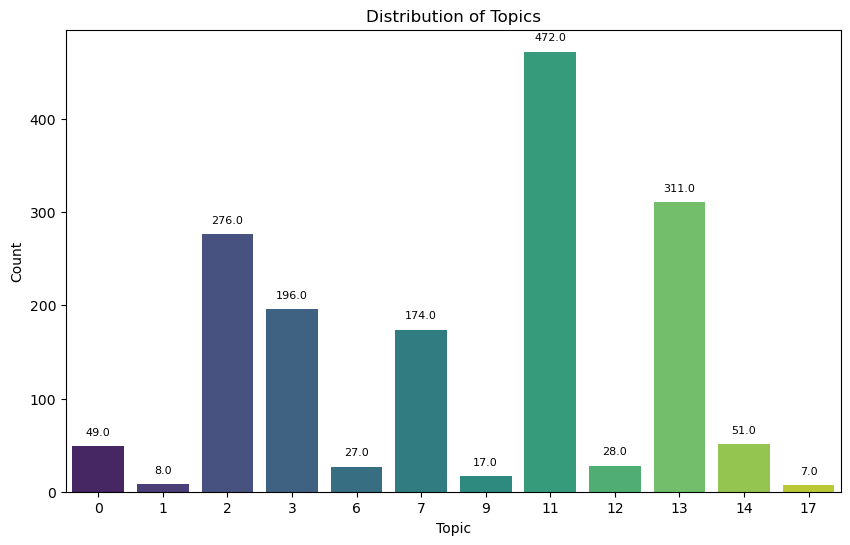

In [261]:
# Count of all the topics that are present in the articles as a bar plot.
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Topic', data=df_1, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

The topic 11 which is (11,
  '0.020*"say" + 0.017*"military" + 0.012*"syrian" + 0.011*"state" + '
  '0.010*"administration" + 0.010*"official" + 0.010*"force" + 0.009*"ally" + '
  '0.009*"government" + 0.008*"support"') is referenced to highest number of articles which is 472. The topic with least number is 17 with 7 articles.

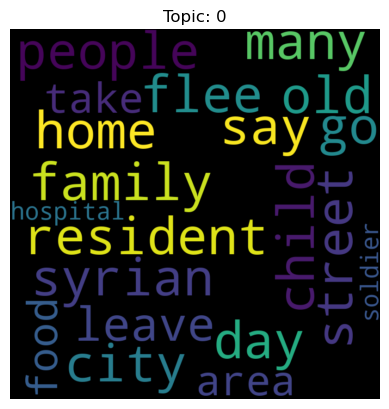

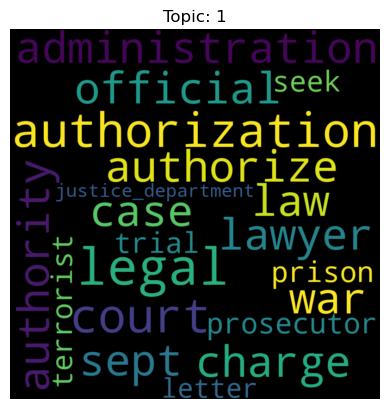

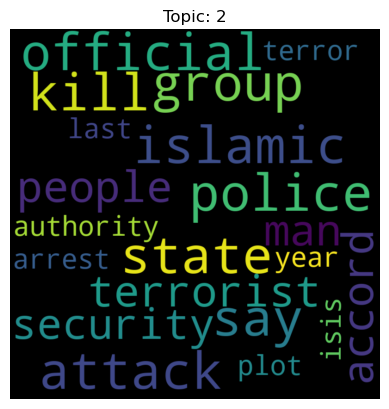

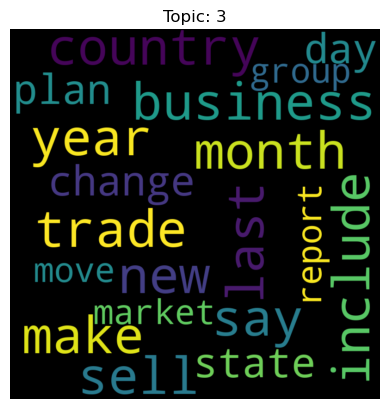

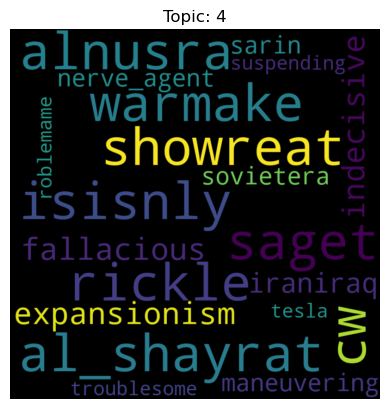

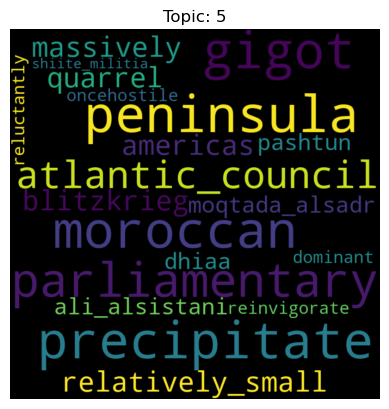

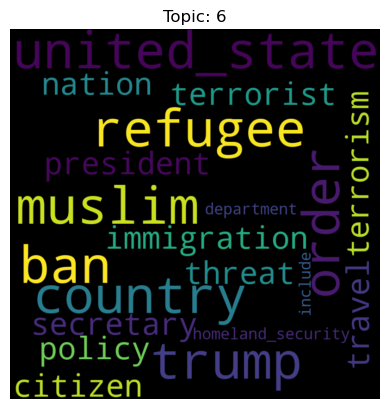

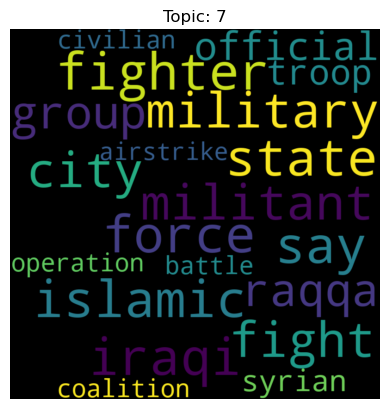

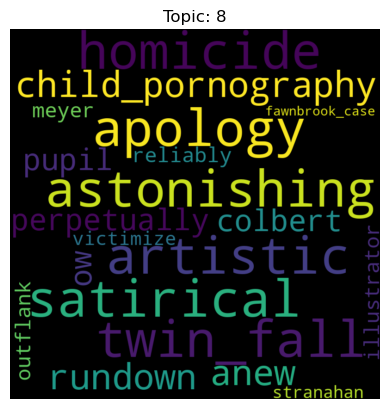

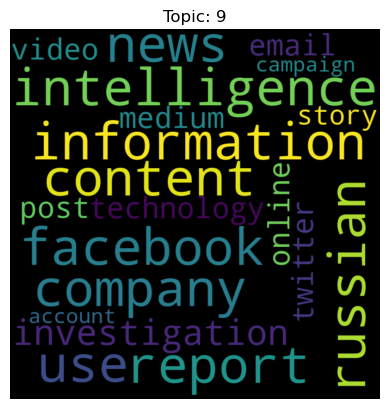

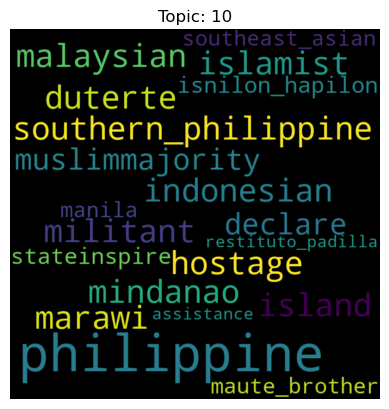

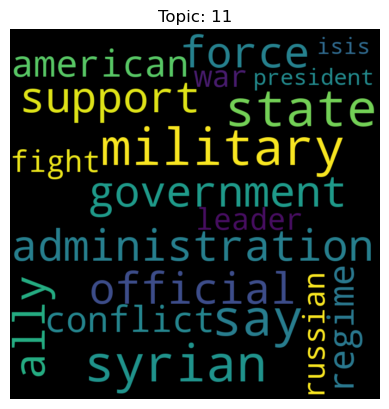

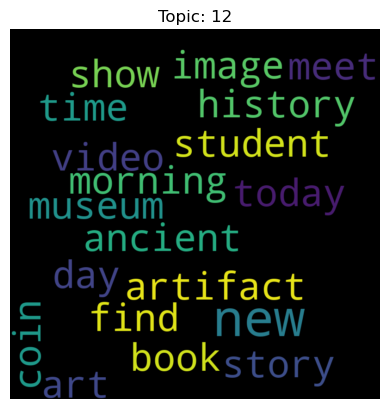

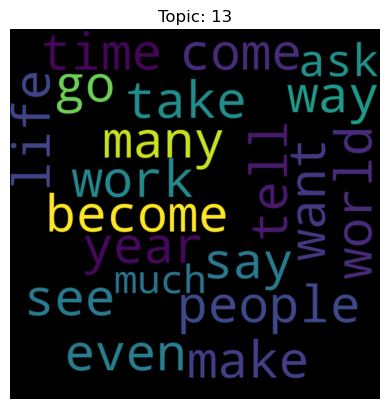

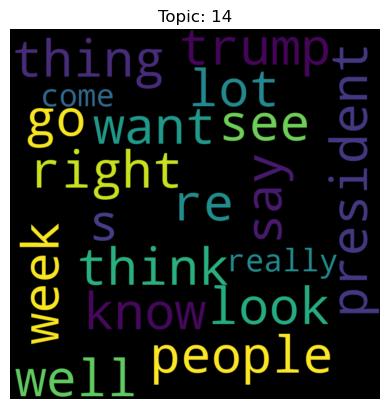

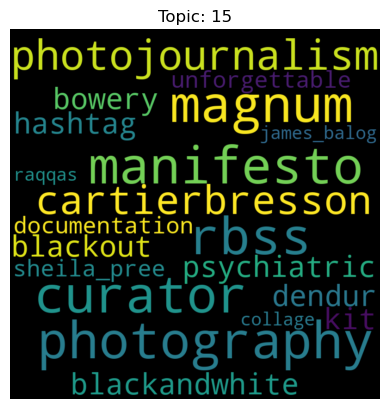

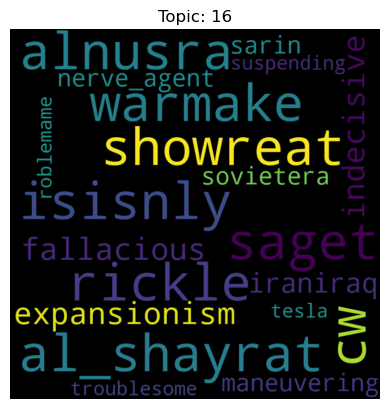

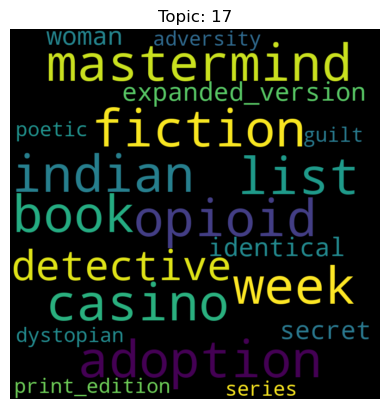

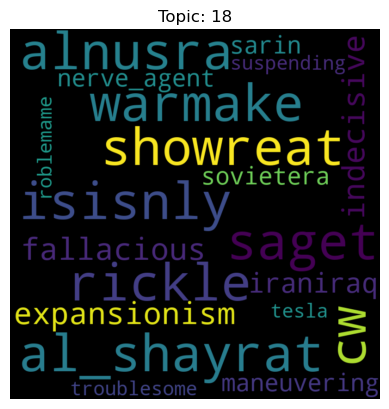

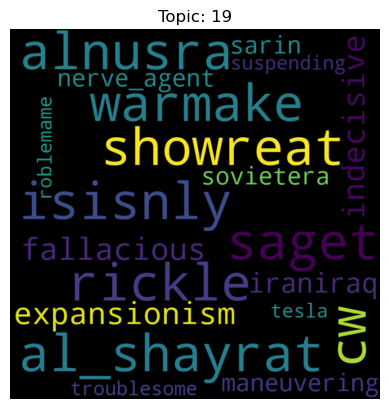

In [226]:
# top 20 words for all the 20 topics as a wordcloud
for topic_id, topic in enumerate(lda_model.print_topics(num_topics=20, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [213]:
# optimal number of topics 

def compute_coherence_values(dictionary, corpus, texts, limit, start):
    coherence_values = []
    model_list = []
    perplexity = []
    for num_topics in range(start, limit):
        model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary,random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        perplexity.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity

# Set the range of topics to explore
start = 15
limit = 30

# Run the function to get models and coherence values
model_list, coherence_values,perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit)


In [274]:
for i in range(15,30):
    
    output_path = r'C:\Users\mukes\Downloads\Text Mining Project3\lda_output_'+str(i)+'_topics.txt'
    with open(output_path, 'w') as f:
        f.write(f"Number of Topics: {i}\n")
        f.write(f"Number of Passes: {10}\n")
        f.write(f"Perplexity: {perplexity_values[i-15]}\n")
        f.write(f"Coherence Score: {coherence_values[i-15]}\n\n")

In [214]:
models = pd.DataFrame({'Topics': [i for i in range(15, 30)], 'coherence_values': coherence_values, 'perplexity_value': perplexity_values})

In [215]:
models

Topics  coherence_values  perplexity_value
0       15          0.457009         -9.582998
1       16          0.489245         -9.696508
2       17          0.459985         -9.834827
3       18          0.435964         -9.949514
4       19          0.421342        -10.074754
5       20          0.448453        -10.185260
6       21          0.471243        -10.299457
7       22          0.463671        -10.420741
8       23          0.474031        -10.545910
9       24          0.448122        -10.667059
10      25          0.460018        -10.772767
11      26          0.433633        -10.910795
12      27          0.443289        -11.008675
13      28          0.465885        -11.144233
14      29          0.407365        -11.253261

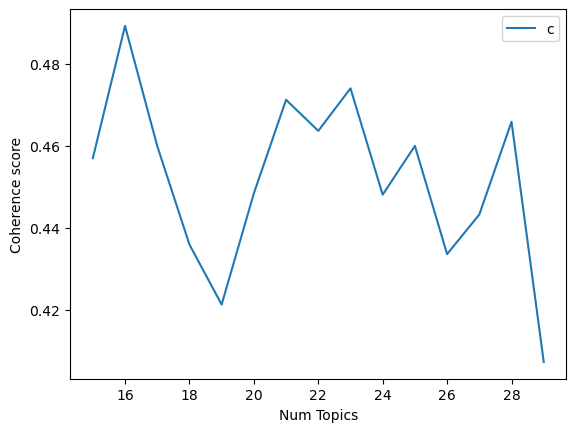

In [216]:
x = models['Topics']
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Highest coherence value is observed at 16 topics 

In [217]:
model_list[1].

In [243]:
# Extract topics
# Print the keyword of topics
pprint(model_list[1].print_topics())
doc_lda = model_list[1][corpus]

[(0,
  '0.027*"say" + 0.012*"city" + 0.011*"people" + 0.009*"family" + '
  '0.009*"child" + 0.009*"day" + 0.007*"home" + 0.007*"old" + 0.007*"man" + '
  '0.007*"woman"'),
 (1,
  '0.041*"refugee" + 0.033*"country" + 0.029*"order" + 0.027*"united_state" + '
  '0.023*"ban" + 0.023*"immigration" + 0.022*"muslim" + 0.013*"visa" + '
  '0.012*"travel" + 0.012*"terrorist"'),
 (2,
  '0.049*"say" + 0.030*"attack" + 0.020*"state" + 0.019*"islamic" + '
  '0.016*"group" + 0.013*"kill" + 0.012*"official" + 0.012*"terrorist" + '
  '0.012*"police" + 0.009*"man"'),
 (3,
  '0.027*"say" + 0.010*"administration" + 0.009*"trump" + 0.008*"new" + '
  '0.008*"president" + 0.007*"year" + 0.007*"official" + 0.007*"country" + '
  '0.007*"also" + 0.006*"military"'),
 (4,
  '0.016*"detainee" + 0.005*"transfer" + 0.002*"follow_charlie" + '
  '0.002*"newly_capture" + 0.001*"indefinite_detention" + '
  '0.001*"charliesavage" + 0.001*"repatriate" + 0.001*"savage" + '
  '0.001*"pretrial" + 0.001*"trial"'),
 (5,
  '0.01

In [263]:
doc_topics = model_list[1].get_document_topics(corpus_1)

dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in doc_topics]

df_2 = pd.DataFrame({'Article': [" ".join(doc) for doc in tokenized_documents], 'Topic': dominant_topics})

print(df_2)

                                                Article  Topic
0     istanbul urkish officials accused the united s...      2
1     as boy bands go it was an unlikely crew in a f...      3
2     german prosecutors have added six counts of mu...      2
3     baghdad suicide bomber detonated a pickup truc...      2
4     baghdad a suicide bomber detonated a pickup tr...      2
...                                                 ...    ...
1611  defeating islamic state is the trump administr...      3
1612  washingtonhe trump administration on wednesday...      3
1613  iraq is set to raise billion through its first...      3
1614  defeating islamic state is the trump administr...      3
1615  after the syrian government recently introduce...      3

[1616 rows x 2 columns]


### Visualization

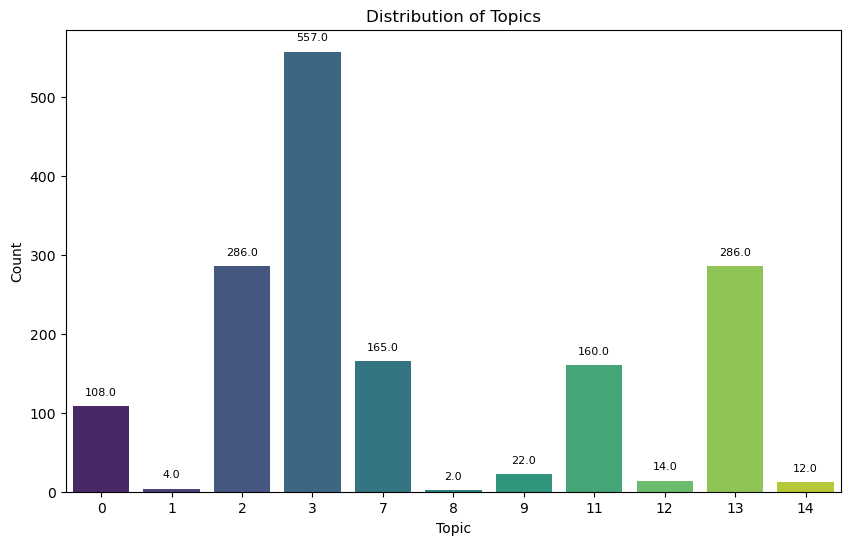

In [266]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Topic', data=df_2, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

Same as model with 20 topics for the 16 topics the highest topic is also same with more number of articles added to the topic which is 557 and the least if for 8th topic with only 2 articles.

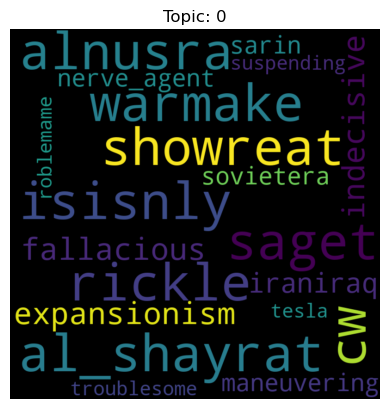

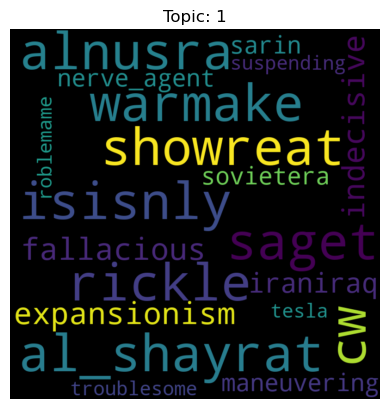

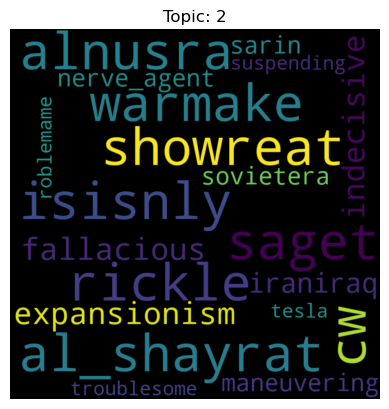

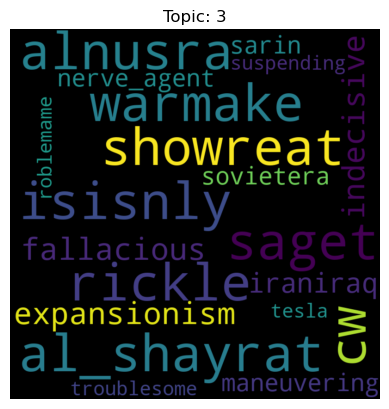

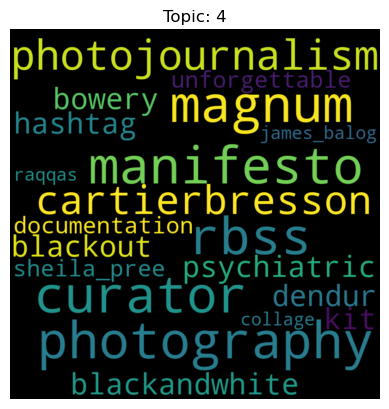

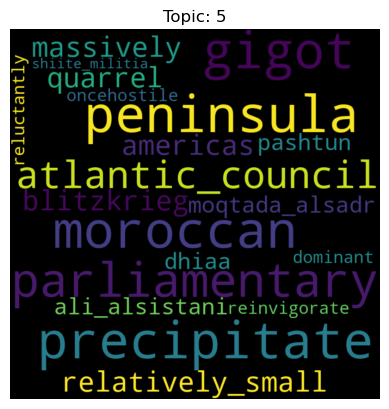

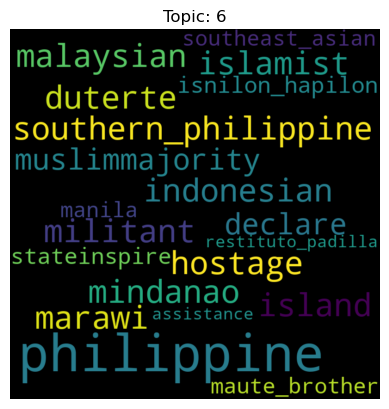

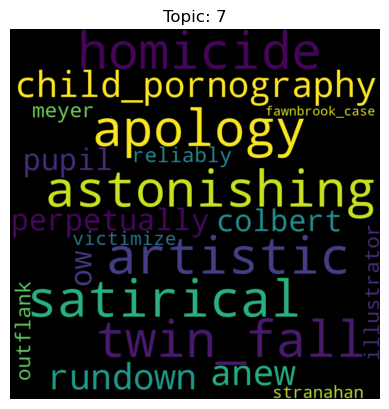

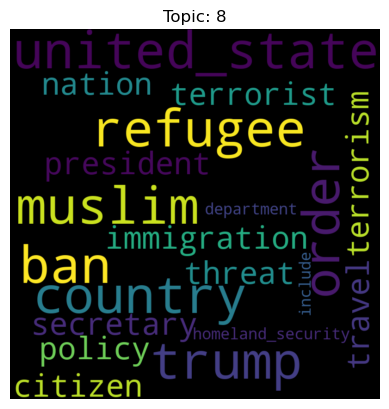

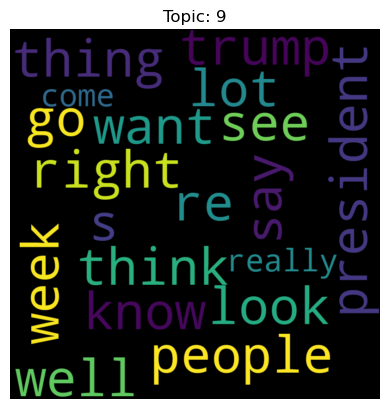

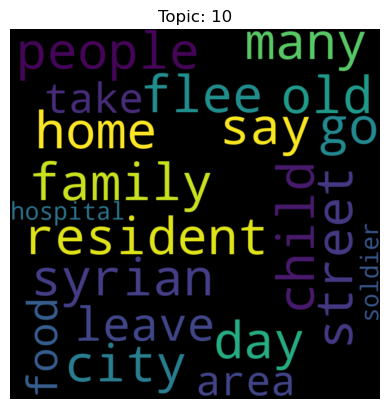

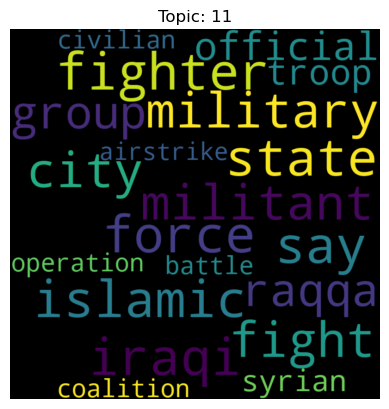

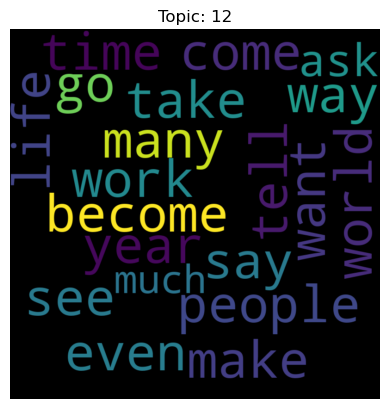

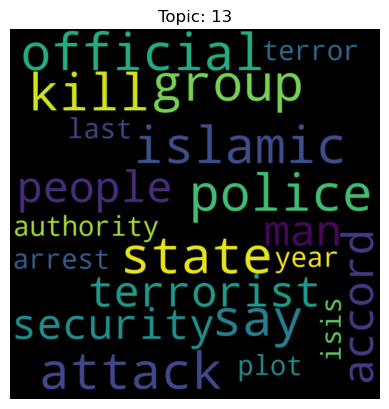

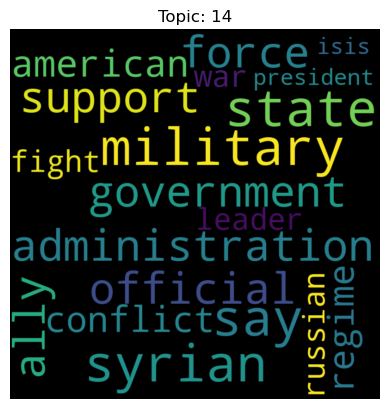

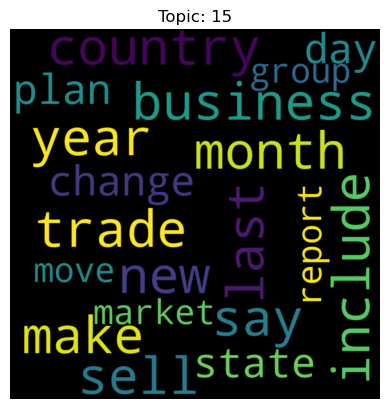

In [227]:
# print the top 20 words as a word plot from all the topics
for topic_id, topic in enumerate(lda_model.print_topics(num_topics=16, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()